# Importando Módulos

In [376]:
import pandas as pd

# Dataset

Agora vamos importar o nosso dataset (trazer mais informações)

In [377]:
dataset = pd.read_csv('dataset/exams.csv')
dataset.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [378]:
# Empty cells
dataset.isnull().sum() #columns exame_33 is empty
dataset_v1 = dataset.drop(columns="exame_33")

In [379]:
from sklearn.model_selection import train_test_split
from numpy import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier


SEED = 123
random.seed(SEED)

def forestClassifier(diagnostics, values):

    train_x, test_x, train_y, test_y = train_test_split(values, diagnostics, test_size=0.3)

    classifier = RandomForestClassifier(n_estimators=100)
    classifier.fit(train_x, train_y)


    return classifier.score(test_x, test_y)


def dummyClassifier(diagnostics, values):

    train_x, test_x, train_y, test_y = train_test_split(values, diagnostics, test_size=0.3)


    classifier = DummyClassifier(strategy='most_frequent')
    classifier.fit(train_x, train_y)

    return classifier.score(test_x, test_y)


In [380]:
diagnostics_v1 = dataset_v1.diagnostico
values_v1 = dataset_v1.drop(columns=['id', 'diagnostico'])

BASELINE = forestClassifier(diagnostics_v1, values_v1)
print('Baseline accuracy:', BASELINE)

Baseline accuracy: 0.9824561403508771


In [381]:
most_frequent = dummyClassifier(diagnostics_v1, values_v1)
print('Dummy accuracy: ', most_frequent)


Dummy accuracy:  0.6198830409356725


In [382]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


def violinplot(diagnostics, values, start=0, end=10):

    standardScaler = StandardScaler()
    standardScaler.fit(values)


    fit_diagnostics = diagnostics

    fit_values = standardScaler.transform(values)
    fit_values = pd.DataFrame(data = fit_values, columns = values.keys())

    data_plot = pd.concat([fit_diagnostics, fit_values.iloc[:, start:end]], axis=1)
    data_plot = pd.melt(data_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

    plt.figure(figsize=(10, 10))
    plt.xticks(rotation = 90)
    sns.violinplot(x='exames', y='valores', hue='diagnostico', data=data_plot, split=True)
    


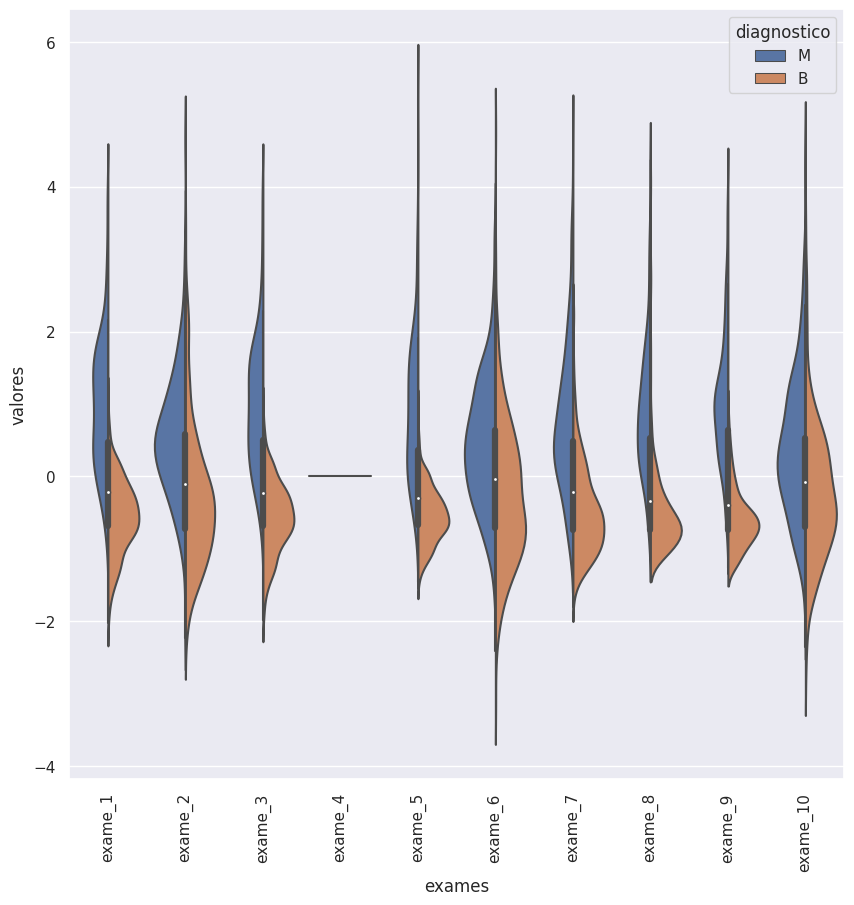

In [383]:
diagnostics_v1 = dataset_v1.diagnostico
values_v1 = dataset_v1.drop(columns=['id', 'diagnostico'])

violinplot(diagnostics=diagnostics_v1, values=values_v1, start=0, end=10)
#violinplot(diagnostics=diagnostics_v1, values=values_v1, start=10, end=20)
#violinplot(diagnostics=diagnostics_v1, values=values_v1, start=20, end=30)


# Redução Dimensional

Analisando os gráficos de violinos conseguimos perceber a presenta de valores constantes. Dropamos os valores do nosso database e obtemos uma segunda versão do nosso dabase **database_v2**


In [384]:
dataset_v2 = dataset_v1.drop(columns=['exame_4', 'exame_29'])

diagnostics_v2 = dataset_v2.diagnostico 
values_v2 = dataset_v2.drop(columns=['id', 'diagnostico'])

print('Accuracy_v2:', forestClassifier(diagnostics_v2, values_v2))

Accuracy_v2: 0.9590643274853801


# Correlação de Dados
Para nossa correlação de dados, vamos fazer um **mapa de calor**. E posteriomente excluir os dados com alta correlação

<Axes: >

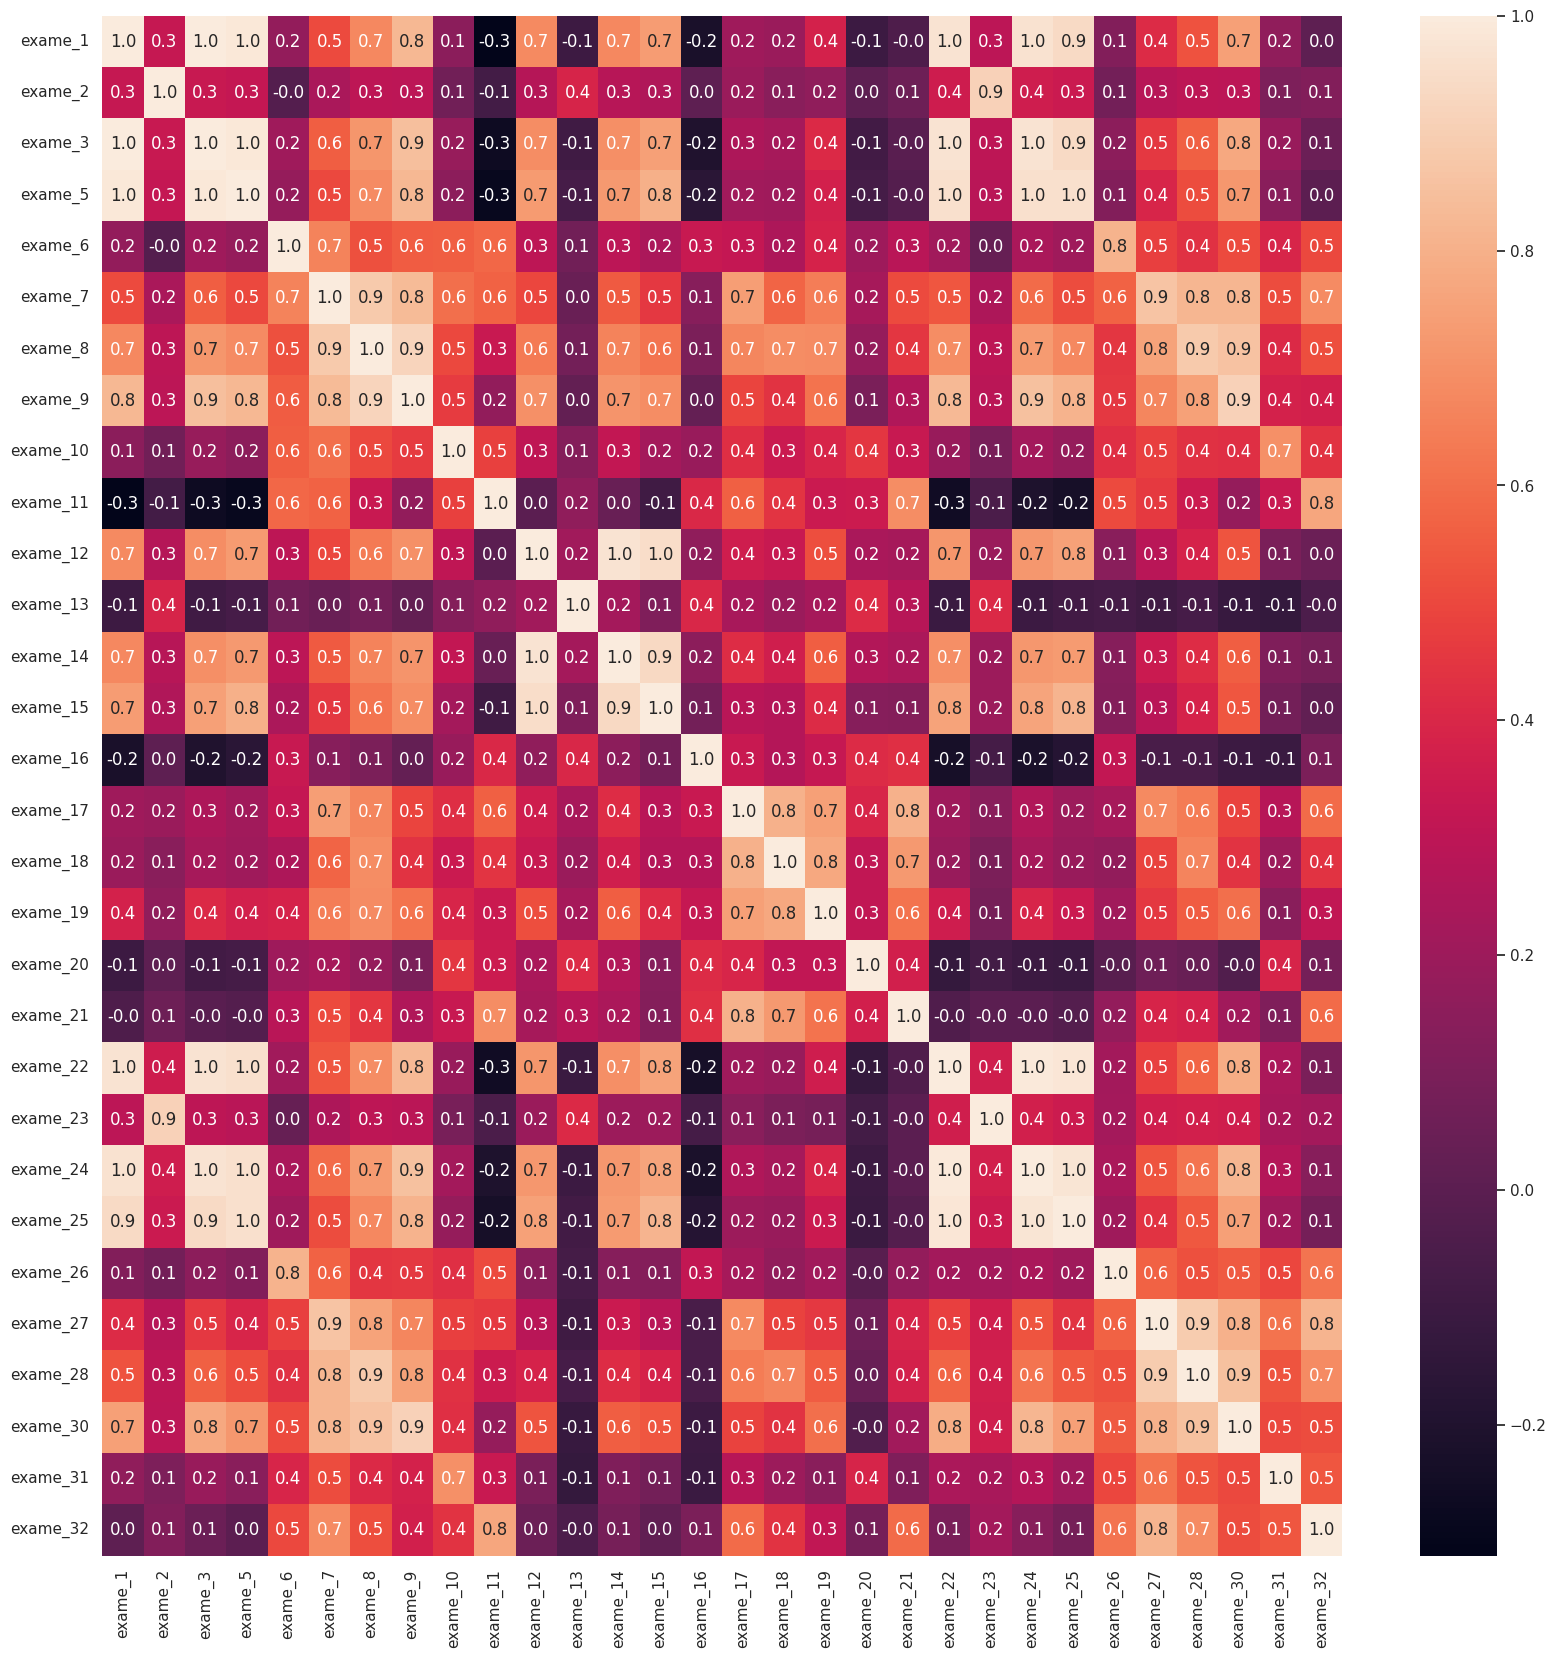

In [385]:
correlation_v2 = values_v2.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_v2, annot=True, fmt = '.1f')


In [386]:
correlation_v3 = correlation_v2[correlation_v2 > 0.99]
correlation_v3 = correlation_v3.sum()

correlation_v3


exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [387]:
# Variaveis altamente correlacionadas

correlation_v4 = correlation_v3[correlation_v3 > 1]
correlation_v4


exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Dropando os valores altamente correlacionados

In [388]:
dataset_v3 = dataset_v2.drop(columns = ['exame_3', 'exame_24'])
diagnostics_v3 = dataset_v2.diagnostico
values_v3 = dataset_v2.drop(columns=['id', 'diagnostico'])


print('Accuracy_v3:', forestClassifier(diagnostics_v3, values_v3))

Accuracy_v3: 0.9590643274853801


# Redução dimensional ( de 30 para 5)
Agora vamos reduzir o nosso dataset de 30 exames para 5, apenas

In [389]:
from sklearn.feature_selection import SelectKBest, chi2

select_kbest = SelectKBest(chi2, k = 5)

train_x, test_x, train_y, test_y = train_test_split(values_v3, diagnostics_v3, test_size=0.3)

select_kbest.fit(train_x, train_y)
test_kbest = select_kbest.transform(test_x) 
train_kbest = select_kbest.transform(train_x)


test_kbest.shape

(171, 5)

In [390]:
classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
classifier.fit(train_kbest, train_y)

print('Accuracy_v4:', classifier.score(test_kbest, test_y))

Accuracy_v4: 0.935672514619883


In [391]:
# Seleção de features com algoritmos automatizados!

[Text(0.5, 76.24999999999999, 'Predict'), Text(91.25, 0.5, 'Real')]

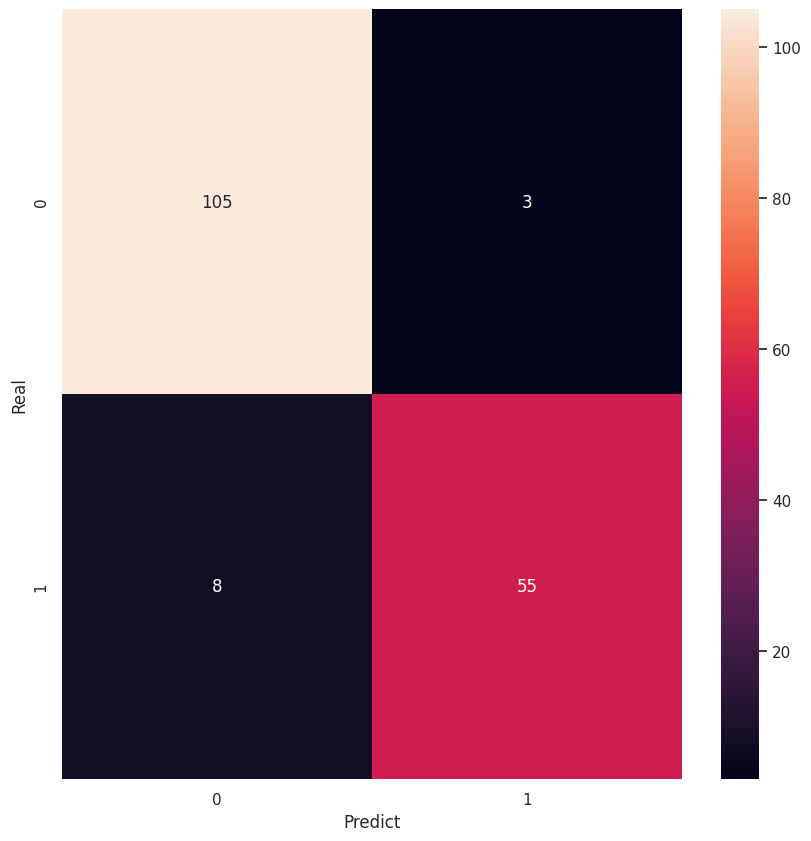

In [392]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(test_y, classifier.predict(test_kbest))

plt.figure(figsize=(10,10))
sns.set()
sns.heatmap(confusion, annot=True, fmt='d').set(xlabel='Predict', ylabel='Real')
